Домашнее задание – подготовить отчет для Минтранса, раскрывающий характер и особенности задержек рейсов. Отчет должен помочь выявить проблемные зоны и способствовать принятию решений. Поэтому стремитесь не констатировать общие факты, а показывать проблемы. Например, факт «средняя задержка вылета составляет 15 минут» сам по себе мало о чем говорит и не помогает понять, почему так происходит. Напротив, график, показывающий, что в понедельник задержки увеличиваются в три раза по сравнению с другими днями на фоне увеличения количества рейсов и пассажиров, наводит на мысль о возможной причине проблемы: аэропорты не справляются с неравномерной нагрузкой.

Отчет должен быть в виде блокнота с четкой структурой. В начале ячейки Markdown идет краткое описание изучаемого вопроса (что мы будем изучать), затем код и все его выходы (таблицы, графики, значения), затем снова в ячейке Markdown, в которой сформулирован ваш краткий вывод

Отчет должен содержать не менее 5 результатов, подтвержденных графиками. Для разнообразия материала используйте разные виды схем. Все графики должны быть снабжены необходимыми подписями (обозначения осей, заголовок, легенда цветовой схемы).

Для решения задач используйте методы библиотеки 'pandas'.



.




---




.


Перед анализом объединю данные и удалю некорректные\неполные\неиспользуемые данные

Далее для анализа причин задержек буду рассматривать следующие характеристики рейсов:

1.Авиакомпании

2.Время отправления

3.Дистанция полета

4.Аэропорт отправления

5.Штат отправления



In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

flights = pd.read_csv('flights.csv', low_memory = False)
airports = pd.read_csv('airports.csv')
airlines = pd.read_csv('airlines.csv')

Проверим что все аэропорты и авиалинии из flightgs есть в airports и airlines.

 Удалим некорректные рейсы, выведем результат.

In [21]:
iata_codes_airports = set(airports['IATA_CODE'])
iata_codes_airlines = set(airlines['IATA_CODE'])
rows_before = flights.shape[0]

flights = flights[
    flights['ORIGIN_AIRPORT'].isin(iata_codes_airports) &
    flights['AIRLINE'].isin(iata_codes_airlines)
]

rows_after = flights.shape[0]
if rows_before > rows_after:
    print(f"Удалено {rows_before - rows_after} рейсов")
else:
    print("Данные остались без изменений")

Удалено 486165 рейсов


Объединим данные

In [22]:
data = pd.merge(flights, airlines, left_on = 'AIRLINE', right_on = 'IATA_CODE', how = 'left')
data = pd.merge(data, airports, left_on = 'ORIGIN_AIRPORT', right_on = 'IATA_CODE', how = 'left')

data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,WEATHER_DELAY,IATA_CODE_x,AIRLINE_y,IATA_CODE_y,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,NaN,AS,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,NaN,AA,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,NaN,US,US Airways Inc.,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,NaN,AA,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,NaN,AS,Alaska Airlines Inc.,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931


Считаю корректным анализировать в дальнейшем лишь рейсы с положительной задержкой

Для полноты анализа посмотрела оба случая, результаты практически одинаковые (но чуть более выраженные - в общем случае);

---
Удалим данные которые не влияют на наши выводы


In [23]:
data = data[data['DEPARTURE_DELAY'] > 0]

columns_drop = [
       'AIRLINE_x', 'IATA_CODE_x', 'IATA_CODE_y', 'CITY', 'COUNTRY', 'CANCELLATION_REASON', 'TAXI_IN', 'ARRIVAL_DELAY', 'DIVERTED',
       'WHEELS_OFF', 'WHEELS_ON', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DESTINATION_AIRPORT',
       'SCHEDULED_TIME', 'TAXI_OUT', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
data = data.drop(columns = columns_drop, errors = 'ignore')
data = data.rename(columns = {'AIRLINE_y': 'AIRLINE'})
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DISTANCE,CANCELLED,AIRLINE,AIRPORT,STATE,LATITUDE,LONGITUDE
7,2015,1,1,4,LAX,30,44.0,14.0,2125,0,US Airways Inc.,Los Angeles International Airport,CA,33.94254,-118.40807
9,2015,1,1,4,LAS,30,33.0,3.0,1747,0,Delta Air Lines Inc.,McCarran International Airport,NV,36.08036,-115.15233
20,2015,1,1,4,LAS,55,120.0,25.0,1139,0,Spirit Air Lines,McCarran International Airport,NV,36.08036,-115.15233
27,2015,1,1,4,MSP,115,127.0,12.0,1487,0,Spirit Air Lines,Minneapolis-Saint Paul International Airport,MN,44.88055,-93.21692
29,2015,1,1,4,DEN,120,141.0,21.0,1709,0,American Airlines Inc.,Denver International Airport,CO,39.85841,-104.66700




---


# **1** - Авиакомпании

Проанализируем зависимость средней задержки вылета от авиакомпании организующей рейс

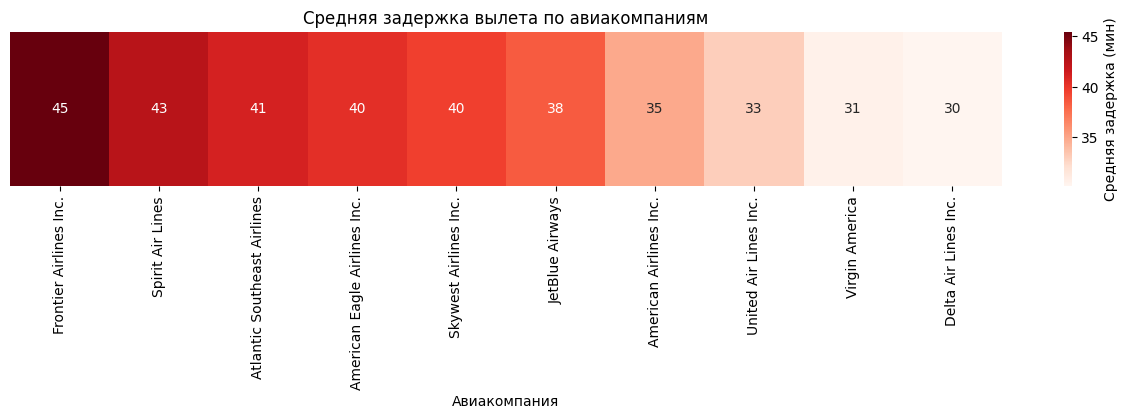

In [24]:
import seaborn as sns

average_delay = data.groupby('AIRLINE')['DEPARTURE_DELAY'].mean().sort_values(ascending=False).head(10)

# преобразуем Series в DataFrame одной строкой, чтобы heatmap мог отобразить
df_delay = pd.DataFrame(average_delay).T

plt.figure(figsize = (16, 2))
sns.heatmap(df_delay, annot = True, cmap = 'Reds', cbar_kws = {'label': 'Средняя задержка (мин)'})
plt.title('Средняя задержка вылета по авиакомпаниям')
plt.xlabel('Авиакомпания')
plt.yticks([])
plt.show()

Таким образом, у разных авиакомпаний происходят разные задержки вылета.


Рекомендую проверить администрирование и техническое обеспечение компаний Frontier Airlines Inc., Spirit Air Lines, Atlantic Southeast Airlines и т.д.(см. график); Ввести стандарты планирования и координации расписания между авиакомпаниями и аэропортом.





---


# **2** - Время суток

Проанализируем зависимость средней задержки вылета в зависимости от времени вылета, отобразим графически

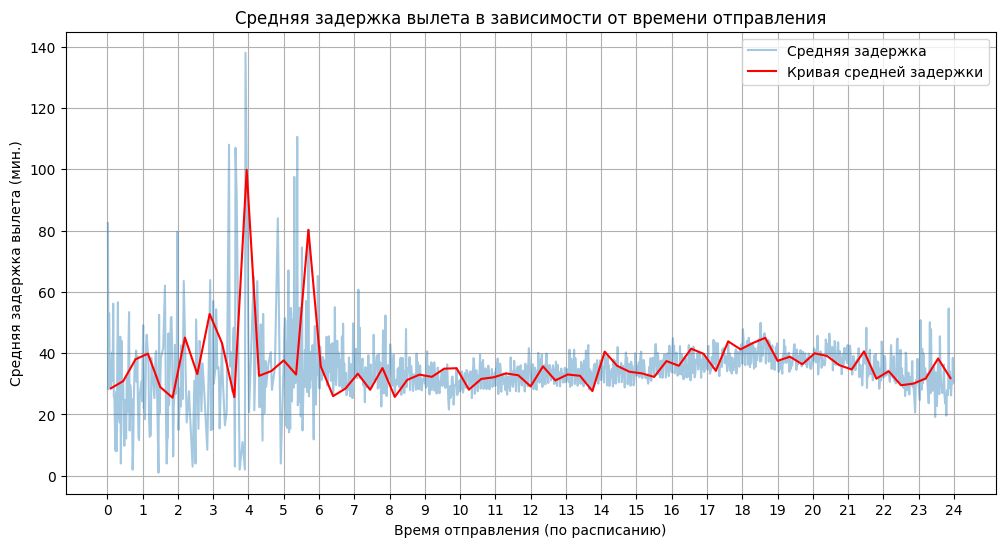

In [25]:
import scipy.interpolate as interp

# Преобразуем время отправления(из 1030 в 10.5)
data['SCHEDULED_TIME'] = data['SCHEDULED_DEPARTURE'] // 100 + (data['SCHEDULED_DEPARTURE'] % 100) / 60.0

# Группируем по времени и считаем среднюю задержку для каждого временного интервала
average_delay = data.groupby('SCHEDULED_TIME')['DEPARTURE_DELAY'].mean()

plt.figure(figsize = (12, 6))
plt.plot(average_delay.index, average_delay.values, alpha = 0.4, label = 'Средняя задержка')
plt.xticks(np.arange(0, 25, 1))

# Интерполяция для кривой
time_index = np.arange(0.1, 24, 0.35)  # Временные метки с шагом
interpolator = interp.interp1d(average_delay.index, average_delay.values, fill_value = 'extrapolate')
curve_average_delay = interpolator(time_index)

plt.plot(time_index, curve_average_delay, color = 'red', label = 'Кривая средней задержки')

plt.title('Средняя задержка вылета в зависимости от времени отправления')
plt.xlabel('Время отправления (по расписанию)')
plt.ylabel('Средняя задержка вылета (мин.)')
plt.grid(True)
plt.legend()
plt.show()

Таким образом, в районе 3-6 часов утра задержки наибольшие.

Это может быть вызвано погодными услоиями, например, туманом и недостаточной видимостью

Рекомендую организовать дополнительное обучение персонала для работы в условиях ограниченной видимости и активнее использовать антифриз)



---


# **3** - Дистанция

Проанализируем зависимость средней задержки вылета от дистанции полета, отобразим графически


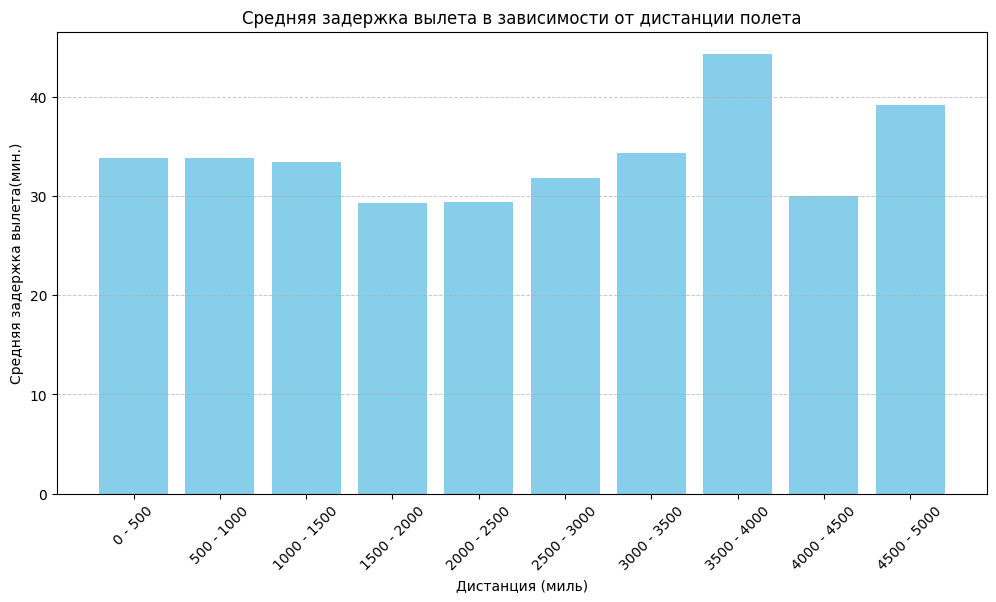

In [26]:
# Делим дистанцию на интервалы по 500 миль
distance_bins = range(0, 5500, 500)
labels = [f'{i} - {i + 500}' for i in distance_bins[:-1]]
data['DISTANCE_GROUP'] = pd.cut(data['DISTANCE'], bins = distance_bins, labels = labels)

# Группируем, считаем среднюю задержку
average_delay = data.groupby('DISTANCE_GROUP', observed = False)['DEPARTURE_DELAY'].mean().reset_index()
plt.figure(figsize = (12, 6))
plt.bar(average_delay['DISTANCE_GROUP'], average_delay['DEPARTURE_DELAY'], color = 'skyblue')
plt.title('Средняя задержка вылета в зависимости от дистанции полета')
plt.xlabel('Дистанция (миль)')
plt.ylabel('Средняя задержка вылета(мин.)')
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.7, alpha = 0.7)
plt.show()




К длительным полетам требуется большая подготовка - заправка топливом, проверка соответствующего технического обеспечения. На графике видно, что задержки увеличиваются при полетах свыше 3500 миль.

Рекомендую выделять большее время на подготовку к более длительным полетам



---



# **4** - Аэропорт отправления




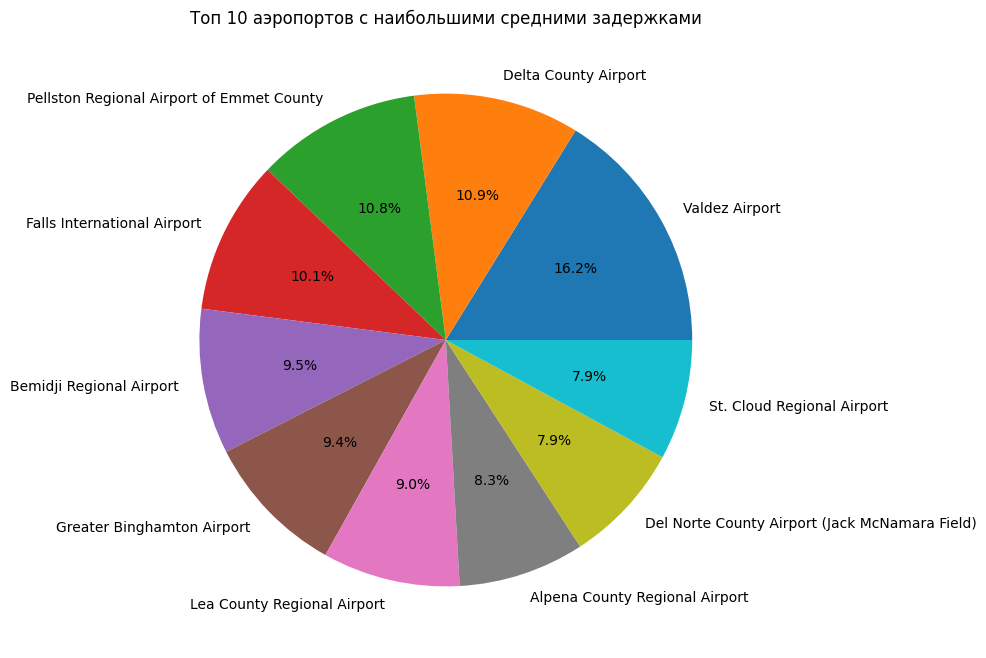

In [27]:
# Группируем, считаем среднюю задержку
average_delay = data.groupby('AIRPORT')['DEPARTURE_DELAY'].mean().reset_index()
top_airports = average_delay.nlargest(10, 'DEPARTURE_DELAY')

plt.figure(figsize = (10, 8))
plt.pie(top_airports['DEPARTURE_DELAY'], labels = top_airports['AIRPORT'], autopct = '%1.1f%%')
plt.title('Топ 10 аэропортов с наибольшими средними задержками')
plt.show()

Средняя задержка вылета так же зависит от аэропорта отправления - может страдать администрирование и логистика аэропортов, особенно Valdez Airport, Delta Country Airport, Pellston Regional Airport of Emmet Country и пр.(см. график).



---


# **5** - Штат

Проанализируем зависимость средней задержки вылета от штата вылета, отобразим графически


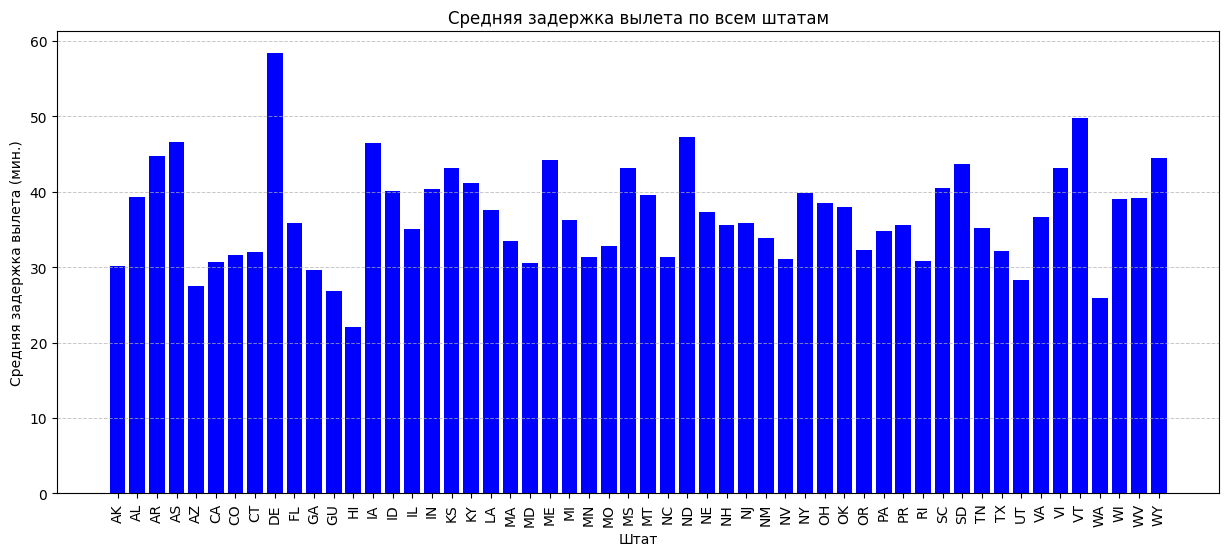

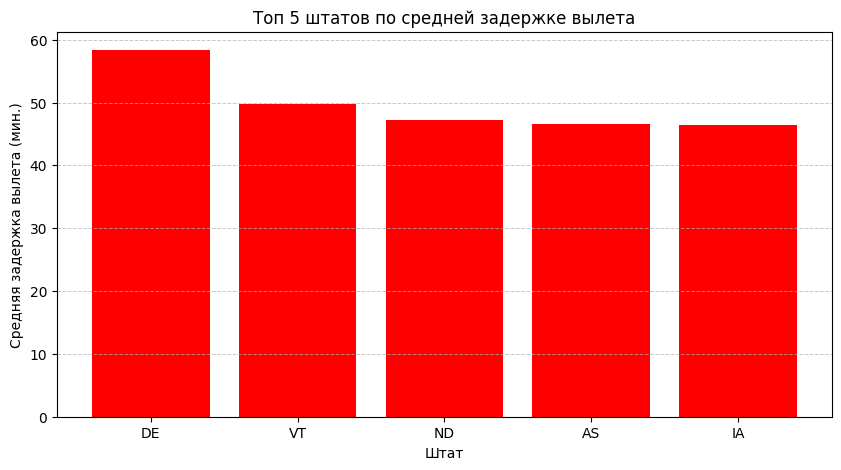

In [28]:
# Группируем, считаем среднюю задержку по штатам
average_delay = data.groupby('STATE')['DEPARTURE_DELAY'].mean().reset_index()

average_delay_sorted = average_delay.sort_values(by = 'DEPARTURE_DELAY', ascending = False)
top_states = average_delay_sorted.head(5)

# Создаем график задержек по всем штатам
plt.figure(figsize=(15, 6))
plt.bar(average_delay['STATE'], average_delay['DEPARTURE_DELAY'], color = 'b')
plt.title('Средняя задержка вылета по всем штатам')
plt.xlabel('Штат')
plt.ylabel('Средняя задержка вылета (мин.)')
plt.xticks(rotation = 90)
plt.grid(axis='y', linestyle='--', linewidth = 0.7, alpha = 0.7)
plt.show()

# Создаем график задержек топ 5 штатов
plt.figure(figsize = (10, 5))
plt.bar(top_states['STATE'], top_states['DEPARTURE_DELAY'], color = 'r')
plt.title('Топ 5 штатов по средней задержке вылета')
plt.xlabel('Штат')
plt.ylabel('Средняя задержка вылета (мин.)')
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.7, alpha = 0.7)
plt.show()

Построены 2 графика, на первом видно, что от штата к штату действительно разнится средняя задержка вылета.
На втором выделила конкретно на что обратить внимание

Считаю, что власти штатов Дэлавер, Вермонт, Северная Дакота, Аризона, и т.д. уделяют недостаточное внимание, контроль, возможно, финансирование своих аэропортов.
Возможно(точно, это же США) имеет место коррупция



---


# Вывод:

Для сокращения задержек вылета необходимо комплексное улучшение взаимодействия между авиакомпаниями, аэропортами и региональными властями, а также внедрение мер, направленных на адаптацию к погодным условиям и особенностям рейсов.